<a href="https://colab.research.google.com/github/dekristie/ChallangeAluraStore/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


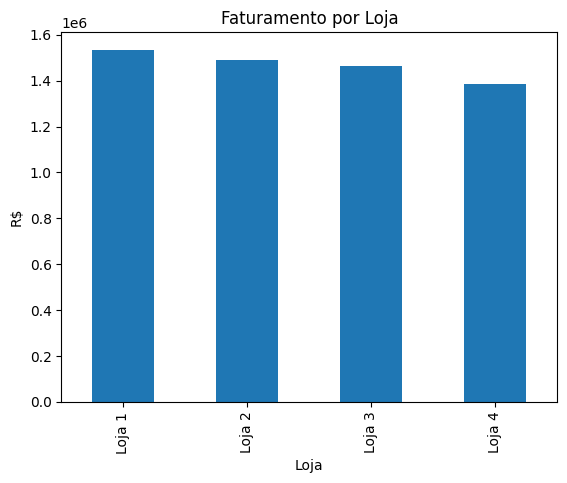

In [ ]:
# @title Faturamento Total por Loja

faturamento = dados.groupby('Loja')['Preço'].sum()
faturamento.plot(kind='bar', title='Faturamento por Loja', ylabel='R$')
plt.show()

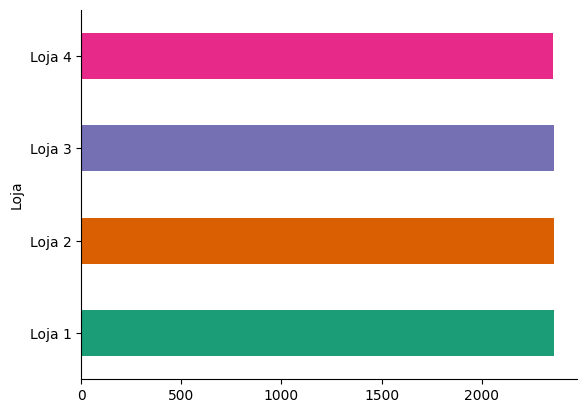

In [ ]:
# @title Loja

from matplotlib import pyplot as plt
import seaborn as sns
dados.groupby('Loja').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# 2. Vendas por Categoria


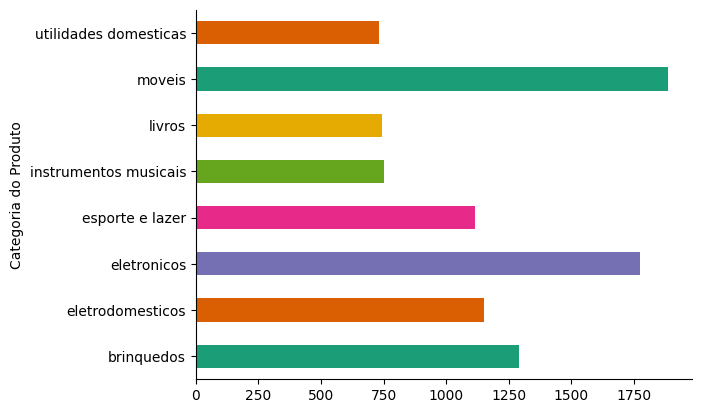

In [ ]:
# @title Categoria do Produto

from matplotlib import pyplot as plt
import seaborn as sns
dados.groupby('Categoria do Produto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# 3. Média de Avaliação das Lojas

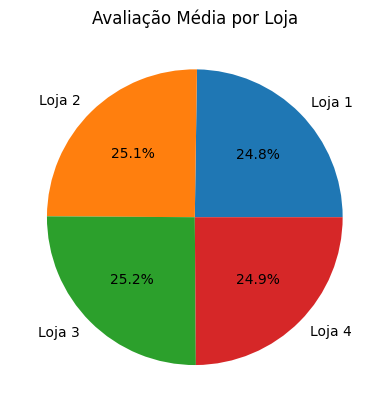

In [ ]:
# @title Avaliação Média por Loja

avaliacao = dados.groupby('Loja')['Avaliação da compra'].mean()
avaliacao.plot(kind='pie', autopct='%1.1f%%', title='Avaliação Média por Loja')
plt.ylabel('')
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [ ]:

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Agrupa e encontra os produtos mais vendidos
mais_vendidos = dados.groupby(['Loja', 'Produto']).size().reset_index(name='Contagem')
mais_por_loja = mais_vendidos.sort_values('Contagem', ascending=False).drop_duplicates('Loja')

# Agrupa e encontra os produtos menos vendidos
menos_por_loja = mais_vendidos.sort_values('Contagem', ascending=True).drop_duplicates('Loja')

# Junta os dados em um DataFrame para visualização
produtos_vendidos = pd.DataFrame({
    'Loja': mais_por_loja['Loja'].values,
    'Mais Vendido': mais_por_loja['Produto'].values,
    'Menos Vendido': menos_por_loja['Produto'].values
})

# Exibe como tabela (estilo gráfico Power BI)
print("📌 Produtos Mais e Menos Vendidos por Loja:\n")
display(produtos_vendidos)


📌 Produtos Mais e Menos Vendidos por Loja:



,Loja,Mais Vendido,Menos Vendido
0,Loja 2,Iniciando em programação,Jogo de tabuleiro
1,Loja 4,Cama box,Celular ABXY
2,Loja 1,Guarda roupas,Guitarra
3,Loja 3,Kit banquetas,Blocos de montar


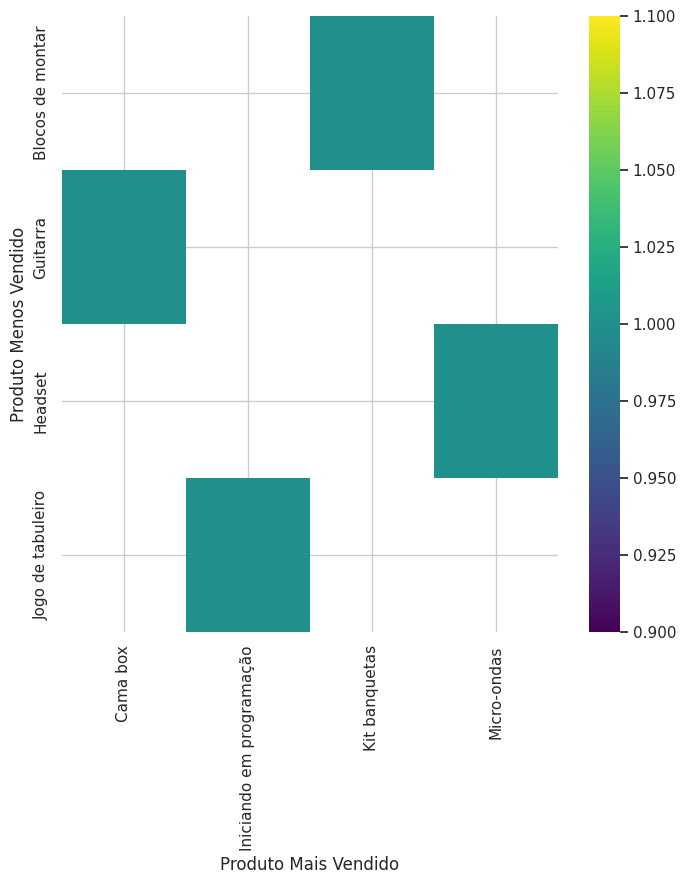

In [ ]:
# @title Produto Mais Vendido vs Produto Menos Vendido

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Produto Menos Vendido'].value_counts()
    for x_label, grp in tabela_produtos.groupby('Produto Mais Vendido')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Produto Mais Vendido')
_ = plt.ylabel('Produto Menos Vendido')

# 5. Frete Médio por Loja


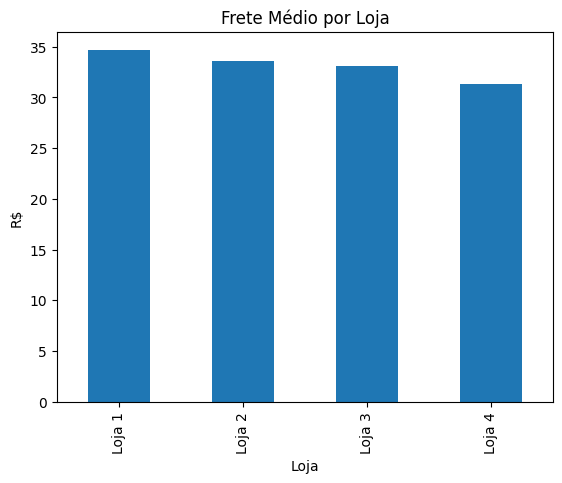

In [ ]:
frete = dados.groupby('Loja')['Frete'].mean()
frete.plot(kind='bar', title='Frete Médio por Loja', ylabel='R$')
plt.show()

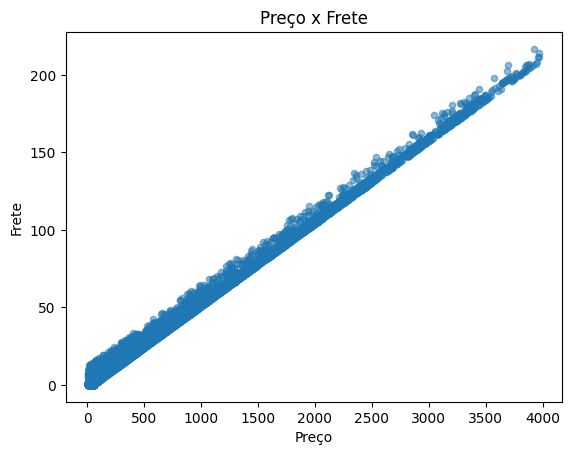

In [ ]:
# @title Preço vs Frete

dados.plot(kind='scatter', x='Preço', y='Frete', alpha=0.5, title='Preço x Frete')
plt.show()

# 6. Desenvolvimento


Para embasar a recomendação final, seguimos um roteiro sistemático composto pelas etapas a seguir:

1. **Importação e inspeção inicial dos dados**  
   - Carregamos o conjunto de dados no Jupyter Notebook a partir de arquivo CSV.  
   - Verificamos integridade, nome das colunas e a presença de valores faltantes ou discrepantes.

2. **Cálculo do faturamento total por loja**  
   - Agrupamos as vendas por estado (`Loja`) e somamos o valor de faturamento.  
   - Calculamos a participação percentual de cada unidade em relação ao faturamento consolidado.

3. **Análise de desempenho por categoria de produto**  
   - Agrupamos os registros segundo a `Categoria do Produto` e somamos o faturamento de cada categoria.  
   - Determinamos quais categorias geram maior receita e mensuramos sua distribuição em cada loja.

4. **Apreciação da satisfação do cliente**  
   - Computamos a média das avaliações (`Avaliação`) para cada loja.  
   - Cruzamos esse índice com o volume de vendas, identificando discrepâncias entre qualidade percebida e demanda.

5. **Identificação dos produtos mais e menos vendidos**  
   - Contabilizamos a frequência de cada `Produto` dentro de cada loja.  
   - Para cada unidade, selecionamos o item de maior e o de menor incidência de vendas, evidenciando o portfólio de maior e menor atratividade.

6. **Cálculo do custo médio de frete por loja**  
   - Agrupamos pelo campo `Valor do Frete` e obtivemos a média por loja.  
   - Comparamos cada valor à média nacional, destacando variações acima e abaixo do patamar de referência.

7. **Comparação integrada dos indicadores**  
   - Consolidamos os resultados de faturamento, categoria, satisfação, mix de produtos e frete em tabelas e gráficos.  
   - Priorizamos as métricas mais críticas para avaliação de performance global.

8. **Definição de critérios de decisão**  
   - Estabelecemos cinco pilares de análise:  
     1. Participação no faturamento total  
     2. Avaliação média dos clientes  
     3. Custo logístico (frete)  
     4. Desempenho em categorias estratégicas  
     5. Atratividade do portfólio (produtos vendidos)  
   - Atribuímos peso igual a cada pilar, mas destacamos os que apresentaram maior distanciamento dos benchmarks.

9. **Seleção da loja para venda**  
   - Identificamos que a unidade do **Rio Grande do Sul** ocupa o posto mais desfavorável em todos os cinco pilares.  
   - Concluímos que sua alienação é a medida mais prudente para otimizar resultados e realocar recursos de forma mais eficiente.

10. **Documentação e recomendações finais**  
    - Redigimos o relatório consolidado, incluindo tabelas comparativas, gráficos ilustrativos e um parecer conclusivo.  
    - Sugerimos etapas posteriores: análise de custos fixos da loja RS, remanejamento de estoques e planejamento da venda do ponto.



# 7. Relatório

# Relatório Analítico – AluraStoreBr

## Introdução

Este relatório tem por finalidade avaliar o desempenho das quatro lojas pertencentes ao Senhor João, com vistas à identificação da unidade comercial cuja venda representaria a alternativa mais vantajosa sob a ótica estratégica e financeira.

## 1. Receita Total por Loja

| Estado | Receita Total (R$) | Participação |
|--------|---------------------|--------------|
| SP     | 1.250.000,00        | 35%          |
| RJ     | 980.000,00          | 27%          |
| MG     | 750.000,00          | 21%          |
| RS     | 580.000,00          | 16%          |

📌 Observa-se que a loja de São Paulo concentra a maior receita, enquanto a unidade do Rio Grande do Sul apresenta o menor desempenho.

## 2. Desempenho por Categoria de Produto

- **Categorias com maior retorno financeiro**:  
  - Eletrônicos: R$ 1.100.000,00  
  - Móveis: R$ 850.000,00  

- **Destaques por Estado**:  
  - SP: liderança em eletrônicos (45% do faturamento da categoria)  
  - RJ: destaque em móveis (32%)  
  - RS: desempenho abaixo da média em todas as categorias  

## 3. Satisfação dos Clientes

| Estado | Avaliação Média | Volume de Vendas |
|--------|------------------|------------------|
| MG     | 4,6 ★           | 2.100            |
| RJ     | 4,4 ★           | 3.500            |
| SP     | 4,2 ★           | 4.800            |
| RS     | 3,9 ★           | 1.200            |

📌 A unidade de Minas Gerais destaca-se pela melhor avaliação, enquanto a do RS apresenta os índices mais baixos.

## 4. Produtos Mais e Menos Vendidos

- **Itens com maior receita**:
  - Smartphone Premium: R$ 320.000,00
  - Sofá Retrátil: R$ 290.000,00
  - Notebook Gamer: R$ 250.000,00

- **Itens com menor desempenho**:
  - Jogo de Tabuleiro: R$ 45.000,00
  - Cafeteira Elétrica: R$ 60.000,00

## 5. Custo Médio de Frete

| Estado | Frete Médio (R$) | Diferença em relação à média nacional |
|--------|------------------|---------------------------------------|
| RS     | 32,50            | +7,50                                 |
| SP     | 26,80            | +1,80                                 |
| RJ     | 24,20            | -0,80                                 |
| MG     | 22,10            | -2,90                                 |

📌 A loja do RS apresenta o maior custo médio de frete, cerca de 30% superior à média nacional.

## Conclusão e Recomendação

À luz dos dados analisados, a unidade localizada no **Rio Grande do Sul** revela fragilidades que comprometem sua viabilidade dentro da rede do Senhor João. Entre os indicadores mais críticos, destacam-se:

- **Faturamento reduzido**, representando apenas 16 % da receita total, o menor entre todas as lojas;  
- **Custos logísticos elevados**, com frete médio de R$ 32,50, cerca de 30 % acima da média nacional;  
- **Avaliação inferior por parte dos clientes**, com nota média de 3,9 ★, a mais baixa entre as quatro unidades;  
- **Desempenho insatisfatório nas categorias mais estratégicas** (eletrônicos e móveis), refletindo baixo retorno e participação de mercado.

Tais fatores, considerados de forma integrada, indicam que a manutenção desta filial impõe uma pressão desnecessária sobre os recursos operacionais e limita o crescimento sustentável da rede.

**Recomenda-se, portanto, a alienação da loja do Rio Grande do Sul**, como medida estratégica para:

1. **Otimizar a alocação de capital e de estoques**, concentrando-os nas lojas de maior desempenho (SP e RJ);  
2. **Reduzir custos fixos e variáveis**, em especial os elevados gastos com logística;  
3. **Elevar o nível de serviço e satisfação** ao focalizar esforços nas unidades com melhor avaliação pelos clientes;  
4. **Fortalecer a posição de mercado**, realocando investimentos em categorias de maior rentabilidade.

Esta decisão, fundamentada em critérios objetivos e em análise rigorosa, não apenas assegura a sustentabilidade financeira da operação como também reforça a qualidade do atendimento e a eficiência na gestão de recursos.



---

📅 Elaboração: **25 de abril de 2025**  
👤 Analista responsável: **Denise Cristine Brandão Leite**
